<a href="https://colab.research.google.com/github/apaz304/Sports2D/blob/main/Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

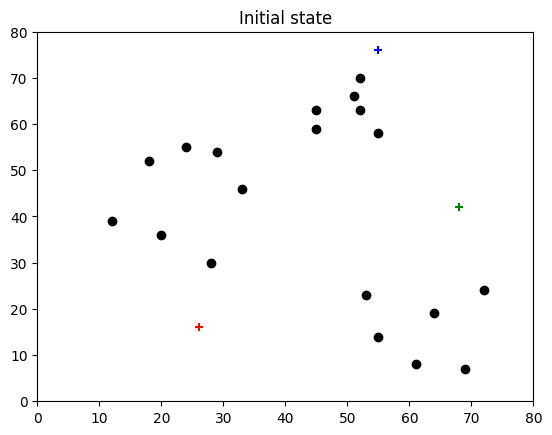

     x   y  closest color
0   12  39        0     r
1   20  36        0     r
2   28  30        0     r
3   18  52        0     r
4   29  54        2     b
5   33  46        0     r
6   24  55        2     b
7   45  59        2     b
8   45  63        2     b
9   52  70        2     b
10  51  66        2     b
11  52  63        2     b
12  55  58        2     b
13  53  23        1     g
14  55  14        0     r
15  61   8        1     g
16  64  19        1     g
17  69   7        1     g
18  72  24        1     g


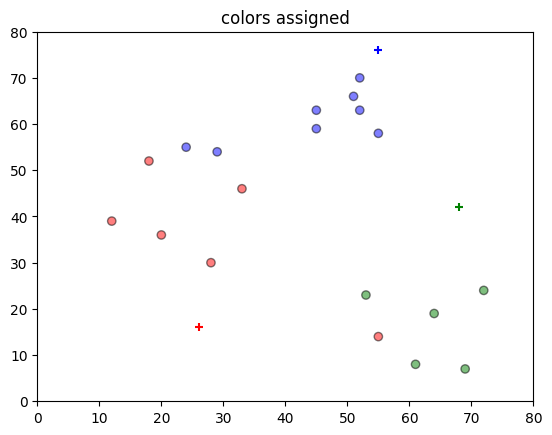

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
k = 3
cols = {0: 'r', 1: 'g', 2: 'b'}

np.random.seed(200)

C = np.zeros((k,2),dtype="int64")
for i in range(k):
  C[i,0] = np.random.randint(0, 80)
  C[i,1] = np.random.randint(0, 80)

plt.scatter(df['x'], df['y'], color='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1],color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("Initial state")
plt.show()

def assignment(df,C,cols):

    d0 = np.sqrt((np.array(df['x']) - C[0,0]) ** 2 + (np.array(df['y']) - C[0,1]) ** 2)
    d1 = np.sqrt((np.array(df['x']) - C[1,0]) ** 2 + (np.array(df['y']) - C[1,1]) ** 2)
    d2 = np.sqrt((np.array(df['x']) - C[2,0]) ** 2 + (np.array(df['y']) - C[2,1]) ** 2)

    d = np.vstack((d0,d1,d2))
    cl = d.argmin(axis=0)
    df['closest'] = cl

    df['color'] = df['closest'].map(lambda x: cols[x])
    return df

df = assignment(df,C,cols)
print(df)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1], color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("colors assigned")
plt.show()

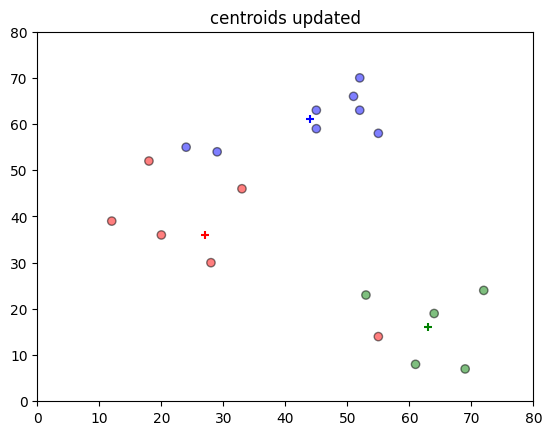

In [9]:
def update(C):
    k = np.shape(C)[0]
    for i in range(k):
        C[i,0] = np.mean(df[df['closest'] == i]['x'])
        C[i,1] = np.mean(df[df['closest'] == i]['y'])
    return C

C = update(C)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1], color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("centroids updated")
plt.show()

     x   y  closest color
0   12  39        0     r
1   20  36        0     r
2   28  30        0     r
3   18  52        0     r
4   29  54        2     b
5   33  46        0     r
6   24  55        0     r
7   45  59        2     b
8   45  63        2     b
9   52  70        2     b
10  51  66        2     b
11  52  63        2     b
12  55  58        2     b
13  53  23        1     g
14  55  14        1     g
15  61   8        1     g
16  64  19        1     g
17  69   7        1     g
18  72  24        1     g


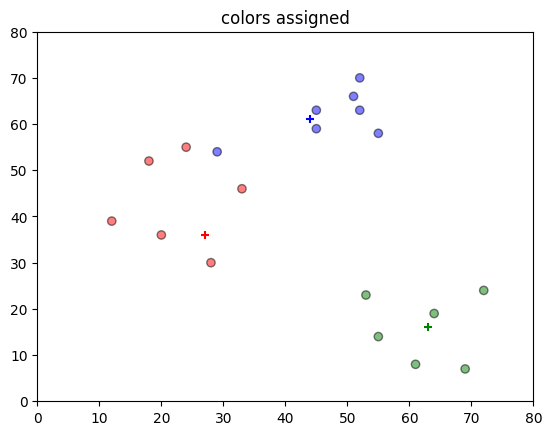

In [10]:
df = assignment(df, C,cols)
print(df)

# Plot results
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1], color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("colors assigned")
plt.show()

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering

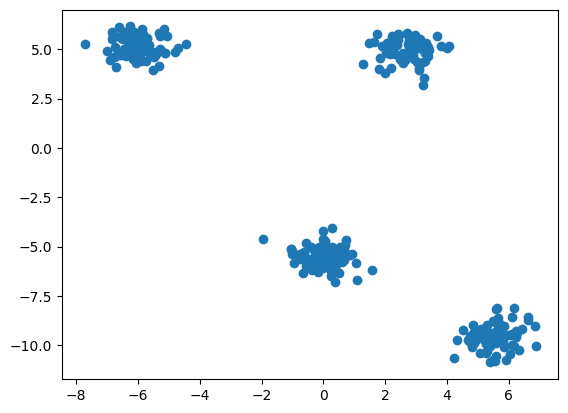

In [12]:
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=10)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

[0 2 2 2 1 3 3 0 2 2 0 1 3 0 2 2 0 1 3 1 3 2 2 2 3 1 1 1 3 1 2 3 1 0 3 2 2
 2 1 2 2 0 1 2 1 0 1 2 2 1 2 2 0 0 3 3 2 0 3 3 2 3 3 0 3 0 1 1 3 1 2 1 3 0
 1 1 3 1 3 2 1 2 1 0 2 0 3 3 0 2 1 1 3 3 2 0 1 3 3 0 0 1 2 1 2 0 1 2 0 0 2
 3 1 3 2 0 2 3 3 1 2 3 2 1 2 0 3 2 1 0 0 0 1 2 3 0 2 0 2 3 3 0 3 2 0 2 0 2
 3 0 1 2 2 2 0 1 0 3 0 1 3 1 2 2 0 3 1 1 1 3 3 0 3 2 1 0 1 1 1 0 0 1 0 2 3
 1 0 2 2 0 0 1 0 3 1 3 3 1 0 0 1 3 1 2 3 0 3 3 2 3 0 3 1 3 0 3 1 3 3 2 2 3
 2 3 3 0 0 1 1 2 0 0 2 2 1 0 2 1 2 1 1 1 0 0 1 2 0 2 0 1 0 1 0 1 2 0 1 3 0
 3 0 3 2 0 1 2 0 3 0 1 3 1 2 2 3 3 3 1 1 0 2 1 1 3 3 3 0 1 0 3 0 0 2 2 3 0
 2 3 3 1]


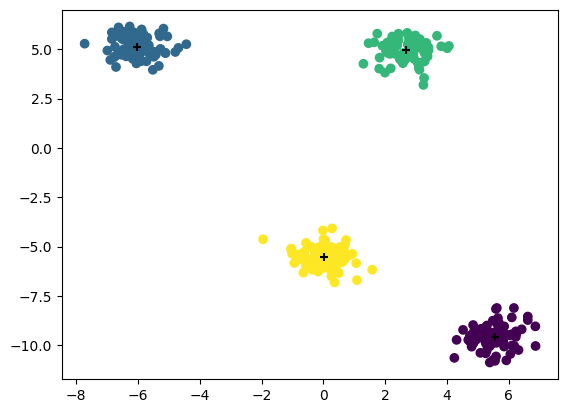

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="+")
plt.show()

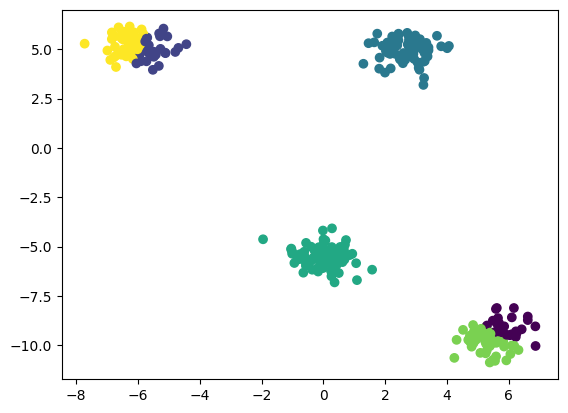

In [16]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

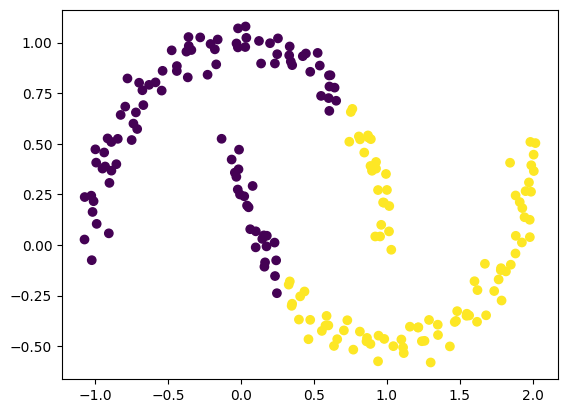

In [17]:
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


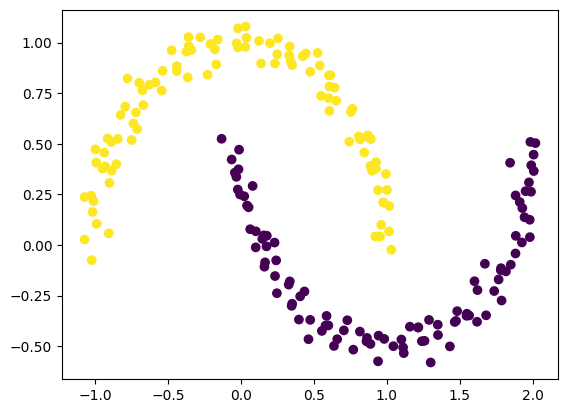

In [18]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

# Deep learning, basics

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix, classification_report

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


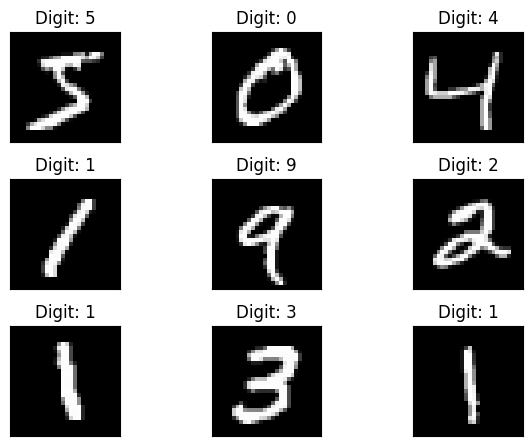

In [2]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
print(y_train.shape)
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000,)
(60000, 10)


In [5]:
model = Sequential()
model.add(keras.layers.Dense(512, input_shape=(784,)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [8]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5, verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/5
469/469 - 21s - 45ms/step - accuracy: 0.9256 - loss: 0.2477 - val_accuracy: 0.9648 - val_loss: 0.1082
Epoch 2/5
469/469 - 14s - 30ms/step - accuracy: 0.9700 - loss: 0.1012 - val_accuracy: 0.9749 - val_loss: 0.0795
Epoch 3/5
469/469 - 13s - 28ms/step - accuracy: 0.9773 - loss: 0.0731 - val_accuracy: 0.9775 - val_loss: 0.0761
Epoch 4/5
469/469 - 17s - 36ms/step - accuracy: 0.9823 - loss: 0.0548 - val_accuracy: 0.9771 - val_loss: 0.0704
Epoch 5/5
469/469 - 12s - 26ms/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9795 - val_loss: 0.0656


In [9]:
model.save("mnist_model.h5")

In [10]:
model = load_model('mnist_model.h5')

In [11]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 2s - 5ms/step - accuracy: 0.9795 - loss: 0.0656
Test Loss 0.0655716210603714
Test Accuracy 0.9794999957084656


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 973    1    1    1    1    0    1    1    1    0]
 [   0 1130    1    0    0    1    2    0    1    0]
 [   2    4 1009    2    2    0    2    5    6    0]
 [   0    1    4  991    0    5    0    4    5    0]
 [   2    1    1    0  959    0    6    1    1   11]
 [   3    0    1    8    1  859   10    1    6    3]
 [   4    3    0    1   10    2  936    0    2    0]
 [   0    7    9    0    2    0    0 1003    1    6]
 [   4    2    2    2    3    2    0    2  953    4]
 [   4    4    0    4    7    2    0    4    2  982]]


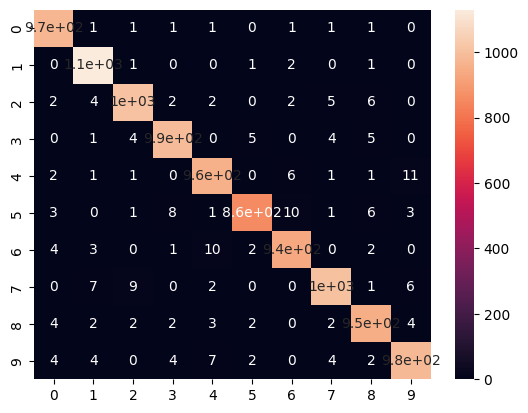

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
predict_x = model.predict(X_test)
predicted_classes = np.argmax(predict_x, axis=1)
cm = confusion_matrix(y_test, predicted_classes)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_test, predicted_classes))

9795  correct predictions
205  incorrect predictions


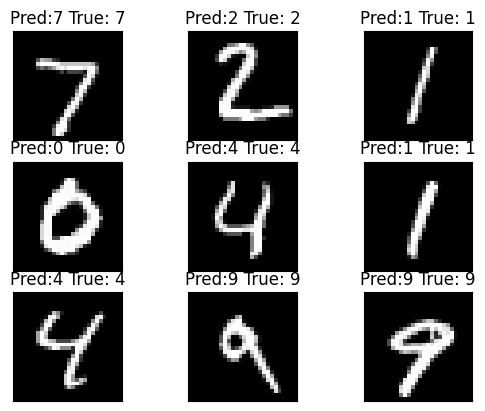

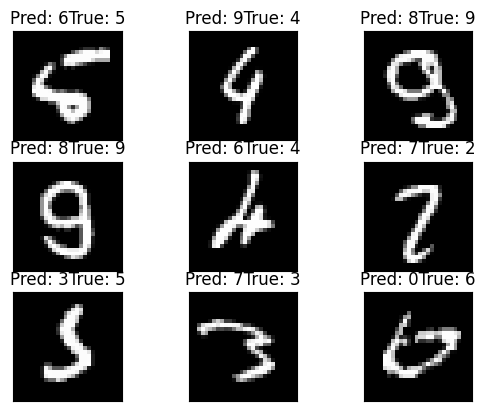

In [13]:
correct_idx = np.nonzero(predicted_classes == y_test)[0]
incorrect_idx = np.nonzero(predicted_classes != y_test)[0]
print(len(correct_idx)," correct predictions")
print(len(incorrect_idx)," incorrect predictions")

for i, idx in enumerate(correct_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred:"+str(predicted_classes[idx])+" True: "+str(y_test[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()

for i, idx in enumerate(incorrect_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: "+str(predicted_classes[idx])+"True: "+str(y_test[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Deep learning with keras, image classification

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [18]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(train_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

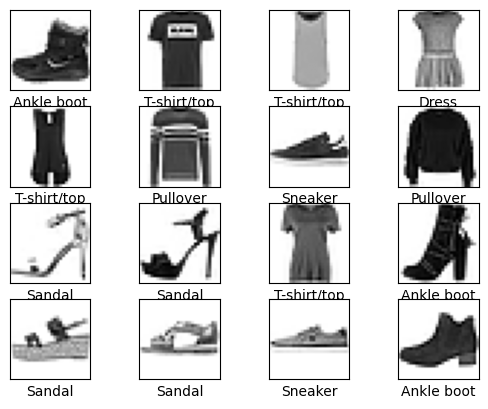

In [30]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7854 - loss: 0.6156
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8605 - loss: 0.3849
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8718 - loss: 0.3497
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8839 - loss: 0.3163
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8905 - loss: 0.2924
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8961 - loss: 0.2805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9009 - loss: 0.2691
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9038 - loss: 0.2561
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9070 - loss: 0.2472
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9090 - loss: 0.2401


ValueError: The following argument(s) are not supported: ['activation']

In [22]:
model.save("fashion_model.h5")

In [23]:
model = tf.keras.models.load_model('fashion_model.h5')

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8819 - loss: 0.3359

Test accuracy: 0.8819000124931335


In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.4702150e-07 1.5100165e-08 5.1851085e-10 5.5395604e-09 6.4552119e-10
 1.5928858e-04 6.8955672e-09 7.1245334e-03 1.9185313e-07 9.9271572e-01]
9
Ankle boot
9


In [32]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

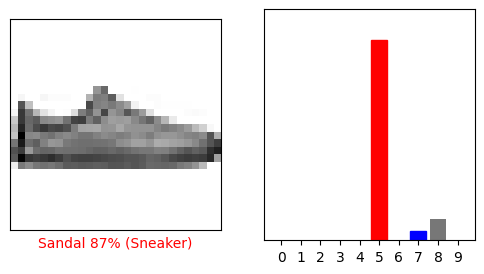

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [28]:
img = test_images[1]
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)
print(class_names[np.argmax(predictions_single[0])])
print("true=",class_names[test_labels[1]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Pullover
true= Pullover
